In [1]:
# TODO: fix trigrams to not predict sequence like x..

#### Exercise 1
**Task:** *Train a **trigram** language model, i.e. take two characters as an input to predict the 3rd one.
Feel free to use either counting or a neural net.
Evaluate the loss; Did it improve over a bigram model?*

In [1]:
words = open('names.txt', 'r').read().split()

In [2]:
import torch

In [3]:
a = [ch for w in words for ch in w ]
alphabet = sorted(list(set(a)))
stoi = {s:i+1 for i, s in enumerate(alphabet)}
stoi['.'] = 0

In [4]:
itos = {i:s for s, i, in stoi.items()}

In [5]:
N = torch.zeros((27, 27, 27))
for w in words:
    w = '..' + w + '..'
    for ch1, ch2, ch3 in zip(w, w[1:], w[2:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        idx3 = stoi[ch3]
        N[idx1, idx2, idx3] += 1

In [6]:
N /= N.sum(2, keepdim=True)

In [7]:
initial_name = '..'
while True:
    idx1 = stoi[initial_name[-2]]
    idx2 = stoi[initial_name[-1]]
    probs = N[idx1, idx2, :]
    ix = torch.multinomial(probs, num_samples=1, replacement=True).item()
    if ix == 0:
        break
    initial_name += itos[ix]
    print(initial_name)


..s
..su
..sue
..suel
..suell
..suelle
..suellea
..suellean
..suelleany


In [8]:
log_likelihood = 0
n = 0

for w in words:
    w = '..' + w + '..'
    for ch1, ch2, ch3 in zip(w, w[1:], w[2:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        idx3 = stoi[ch3]
        prob = N[idx1, idx2, :]
        log_likelihood += torch.log(prob[idx3])
        n += 1

nll = -log_likelihood
nll /= n  

In [9]:
nll

tensor(1.9166)

In [10]:
xs, ys = [], []
for w in words:
    w = '..' + w + '..'
    for ch1, ch2, ch3 in zip(w, w[1:], w[2:]):
        xs.append([stoi[ch1], stoi[ch2]])
        ys.append(stoi[ch3])

In [11]:
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [12]:
w = torch.randn((54, 27), requires_grad=True)

In [31]:
import torch.nn.functional as F

for i in range(5001):
    xenc = F.one_hot(xs, num_classes=27).float().view(-1, 54)
    logits = xenc @ w
    counts = logits.exp()
    probs = counts / counts.sum(dim=1, keepdim=True)
    loss = -probs[torch.arange(xenc.shape[0]), ys].log().mean()
    w.grad = None
    loss.backward()
    w.data -= 10 * w.grad
    if i % 10 == 0:
        print(f'Iteration: {i} | Loss: {loss.item()}')

Iteration: 0 | Loss: 2.0483837127685547
Iteration: 10 | Loss: 2.0483837127685547
Iteration: 20 | Loss: 2.0483834743499756
Iteration: 30 | Loss: 2.0483834743499756
Iteration: 40 | Loss: 2.0483834743499756
Iteration: 50 | Loss: 2.0483834743499756
Iteration: 60 | Loss: 2.0483834743499756
Iteration: 70 | Loss: 2.0483834743499756
Iteration: 80 | Loss: 2.0483832359313965
Iteration: 90 | Loss: 2.0483832359313965
Iteration: 100 | Loss: 2.0483832359313965
Iteration: 110 | Loss: 2.0483832359313965
Iteration: 120 | Loss: 2.0483832359313965
Iteration: 130 | Loss: 2.0483832359313965
Iteration: 140 | Loss: 2.0483832359313965
Iteration: 150 | Loss: 2.0483829975128174
Iteration: 160 | Loss: 2.0483829975128174
Iteration: 170 | Loss: 2.0483829975128174
Iteration: 180 | Loss: 2.0483827590942383
Iteration: 190 | Loss: 2.0483827590942383
Iteration: 200 | Loss: 2.0483827590942383
Iteration: 210 | Loss: 2.0483827590942383
Iteration: 220 | Loss: 2.048382520675659
Iteration: 230 | Loss: 2.048382520675659
Itera

KeyboardInterrupt: 

#### Exercise 2
**Task:** *Split up the dataset randomly into 80% train set, 10% dev set, 10% test set.
Train the bigram and trigram models **only** on the training set. 
Evaluate them on dev and test splits. What can you see?*

In [32]:
from random import shuffle

shuffle(words)
size = len(words)
train_len, dev_len = int(size * 0.8), int(size * 0.9)
train, dev, test = words[0:train_len], words[train_len:dev_len], words[dev_len:]

In [33]:
N = torch.zeros((27, 27))
for w in train:
    w = '.' + w + '.'
    for ch1, ch2 in zip(w, w[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        N[idx1, idx2] += 1
        #print(f'{ch1}{ch2}{ch3}')

In [34]:
N += 1

In [35]:
N /= N.sum(1, keepdim=True)

In [36]:
log_likelihood = 0
n = 0

for w in train:
    w = '.' + w + '.'
    for ch1, ch2 in zip(w, w[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        prob = N[idx1, idx2]
        log_likelihood += torch.log(prob)
        n += 1

nll = -log_likelihood
nll /= n

In [37]:
nll 

tensor(2.4552)

In [38]:
N = torch.zeros((27, 27, 27))
for w in train:
    w = '..' + w + '..'
    for ch1, ch2, ch3 in zip(w, w[1:], w[2:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        idx3 = stoi[ch3]
        N[idx1, idx2, idx3] += 1
        #print(f'{ch1}{ch2}{ch3}')

N += 1
N /= N.sum(2, keepdim=True)
log_likelihood = 0
n = 0

for w in dev + test:
    w = '..' + w + '..'
    for ch1, ch2, ch3 in zip(w, w[1:], w[2:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        idx3 = stoi[ch3]
        prob = N[idx1, idx2, idx3]
        log_likelihood += torch.log(prob)
        n += 1

nll = -log_likelihood
nll /= n

In [39]:
nll

tensor(1.9682)

#### Exercise 3 
**Task:** *Use the dev set to tune the strength of smoothing (or regularization) for the trigram model - i.e. try many possibilities and see which one works best based on the dev set loss.
What patterns can you see in the train and dev set loss as you tune this strength?
Take the best setting of the smoothing and evaluate on the test set once and at the end.
How good of a loss do you achieve?*

In [40]:
N_original = torch.zeros((27, 27, 27))
for w in train:
    w = '..' + w + '..'
    for ch1, ch2, ch3 in zip(w, w[1:], w[2:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        idx3 = stoi[ch3]
        N_original[idx1, idx2, idx3] += 1
        #print(f'{ch1}{ch2}{ch3}')

all_likelihoods = []
for i in range(1, 100):
    N = N_original.clone()
    N += i
    N /= N.sum(2, keepdim=True)
    log_likelihood = 0
    n = 0

    for w in dev:
        w = '..' + w + '..'
        for ch1, ch2, ch3 in zip(w, w[1:], w[2:]):
            idx1 = stoi[ch1]
            idx2 = stoi[ch2]
            idx3 = stoi[ch3]
            prob = N[idx1, idx2, idx3]
            log_likelihood += torch.log(prob)
            n += 1

    nll = -log_likelihood / n
    all_likelihoods.append(nll)

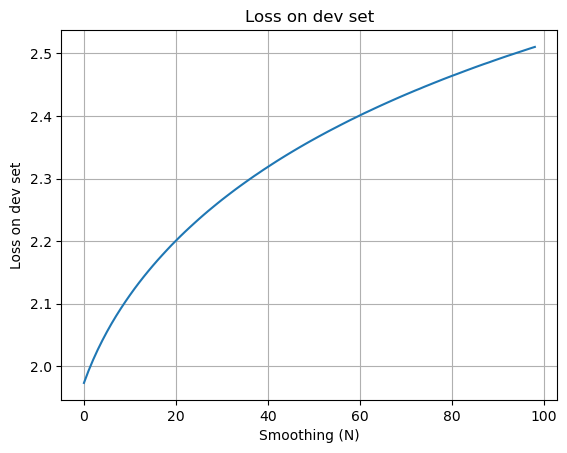

In [42]:
import matplotlib.pyplot as plt

plt.title('Loss on dev set')
plt.xlabel('Smoothing (N)')
plt.ylabel('Loss on dev set')
plt.grid(True)
plt.plot(all_likelihoods)

In [43]:
N = N_original.clone()
N += 1
N /= N.sum(2, keepdim=True)
log_likelihood = 0
n = 0
for w in test:
    w = '..' + w + '..'
    for ch1, ch2, ch3 in zip(w, w[1:], w[2:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        idx3 = stoi[ch3]
        prob = N[idx1, idx2, idx3]
        log_likelihood += torch.log(prob)
        n += 1
nll = -log_likelihood / n
nll

tensor(1.9627)

#### Exercise 4
**Task:** *we saw that our 1-hot vectors merely select a row of W, so producing these vectors explicitly feels wasteful. Can you delete our use of F.one_hot in favor of simply indexing into rows of W?*

In [53]:
xs, ys = [], []
for w in words:
    w = '.' + w + '.'
    for ch1, ch2 in zip(w, w[1:]):
        xs.append(stoi[ch1])
        ys.append(stoi[ch2])

In [54]:
w = torch.randn((27, 27), requires_grad=True)

In [61]:
for i in range(101):
    logits = w[xs]
    log_probs = logits.log_softmax(dim=1)
    # probs = counts / counts.sum(dim=1, keepdim=True)
    loss = -log_probs[torch.arange(len(ys)), ys].mean()
    w.grad = None
    loss.backward()
    w.data += -50 * w.grad
    if i % 10 == 0:
        print(f'Iteration: {i} | Loss: {loss.item()}')

Iteration: 0 | Loss: 2.4556665420532227
Iteration: 10 | Loss: 2.455643653869629
Iteration: 20 | Loss: 2.4556210041046143
Iteration: 30 | Loss: 2.455599069595337
Iteration: 40 | Loss: 2.455577850341797
Iteration: 50 | Loss: 2.455557346343994
Iteration: 60 | Loss: 2.4555370807647705
Iteration: 70 | Loss: 2.455517292022705
Iteration: 80 | Loss: 2.455497980117798
Iteration: 90 | Loss: 2.455479145050049
Iteration: 100 | Loss: 2.455461025238037


#### Exercise 5 
**Task:** *look up and use F.cross_entropy instead. You should achieve the same result. Can you think of why we'd prefer to use F.cross_entropy instead?*

In [62]:
w = torch.randn((27, 27), requires_grad=True)

In [64]:
ys = torch.tensor(ys)

In [80]:
for i in range(101):
    logits = w[xs]
    loss = F.cross_entropy(logits, ys)
    w.grad = None
    loss.backward()
    w.data += -50 * w.grad
    if i % 10 == 0:
        print(f'Iteration: {i} | Loss: {loss.item()}')

Iteration: 0 | Loss: 2.45478892326355
Iteration: 10 | Loss: 2.4547839164733887
Iteration: 20 | Loss: 2.4547784328460693
Iteration: 30 | Loss: 2.454773187637329
Iteration: 40 | Loss: 2.454768180847168
Iteration: 50 | Loss: 2.454763412475586
Iteration: 60 | Loss: 2.454758405685425
Iteration: 70 | Loss: 2.4547533988952637
Iteration: 80 | Loss: 2.4547488689422607
Iteration: 90 | Loss: 2.4547441005706787
Iteration: 100 | Loss: 2.454739570617676


#### Exercise 6
**Task:** *meta-exercise! Think of a fun/interesting exercise and complete it.*